In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [16]:
src_data_date_updated = '181119'
survey_res = pd.read_csv('data/2019-v4-' + src_data_date_updated +'.csv')

In [17]:
conditioning_qs = {
    'gender': 'What is your primary gender identity (if any)?',
    'age': 'What is your current age?',
    'poc': 'Do you identify as a person of color?',
    'years_rangered': 'Total Years Rangered (from Clubhouse)',
    'ch_gender': 'Total Years Rangered (from Clubhouse)'
}

central_qs = {
    'overall_exp' : 'How satisfied are you with your overall experience as a Ranger?',
    'appreciated' : 'How appreciated do you feel by the Ranger department?',
    'nps' : 'If you had a friend that was clearly a Rangerly-type, would you recommend that they volunteer for Rangers?',
    'next_year' : 'Do you plan to Ranger at Burning Man in 2020?'
             }

# survey_res.columns

In [18]:
survey_res.columns

Index(['Timestamp', 'Did you Ranger at Burning Man in 2019?',
       'If you went to Burning Man in 2019 but did not Ranger, why not?',
       'Did you work on Burn Weekend (Saturday or Sunday of the event) in 2019?',
       'If you did not work on Burn Weekend, why not?',
       'Do you plan to Ranger at Burning Man in 2020?',
       'If you do not plan to Ranger next year, why not?',
       'If you have been away from Rangering for a while, what can we do to encourage you to come back?',
       'How satisfied are you with your overall experience as a Ranger?',
       'What would improve your experience with the Rangers?',
       'What do you like or dislike about the organizational culture of the Rangers?',
       'How appreciated do you feel by the Ranger department?',
       'Any suggestions on how the Ranger department could make you feel more appreciated?',
       'How important is Rangering to your overall Burning Man experience?',
       'Are you aware of the Ranger social oppo

In [5]:
def make_bar(central_q, conditioning_q, survey_res, table_row_width_scale=1,rotation=0):
    con_res = survey_res.groupby([conditioning_q, central_q]).size().unstack(fill_value=0)
    cond_freq_res =  con_res.apply(lambda row: row/sum(row),axis=1)

    count_table = con_res.sum(axis=1).apply(str).reset_index()
    count_table_to_display = pd.concat([pd.DataFrame([[count_table.columns[0], "# of Responses"]], columns=count_table.columns), count_table])


    long_cond_freq = cond_freq_res.reset_index().melt(id_vars=conditioning_q).rename(columns={"value": "Fraction of Population"})
    g = sb.catplot(x=central_q ,data=long_cond_freq, y='Fraction of Population',col=conditioning_q,
              kind='bar')
    g.set_titles("{col_var}\n{col_name}")
    g.set_xticklabels(rotation=rotation)
    tbl = plt.table(cellText=count_table_to_display.values,
          colWidths = [1.1]*len(count_table_to_display.columns),
          cellLoc = 'center', rowLoc = 'center',
          loc='right')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize('large')
    tbl.scale(table_row_width_scale,2)


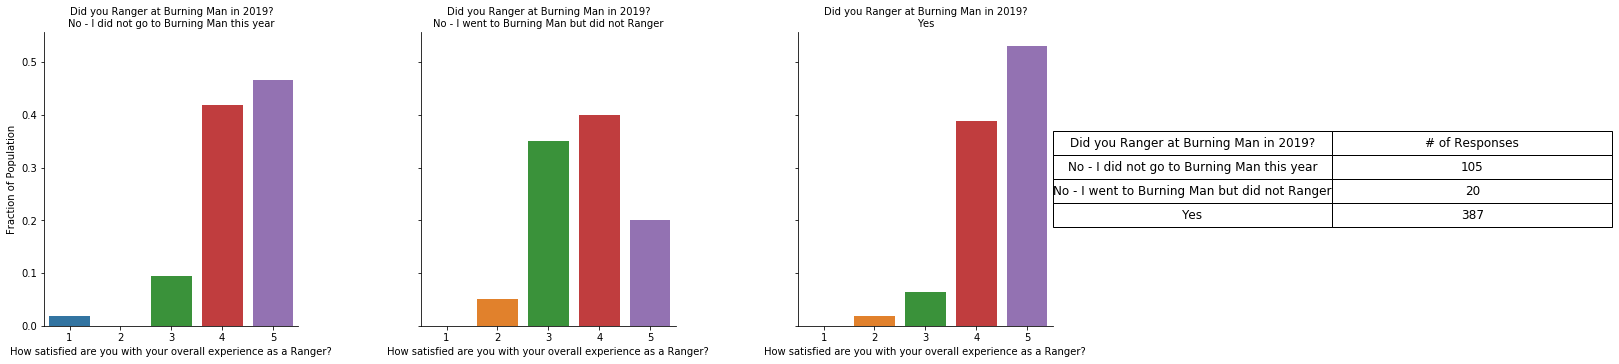

In [6]:
#* How satisfied are you with your overall experience as a Ranger?
make_bar('How satisfied are you with your overall experience as a Ranger?','Did you Ranger at Burning Man in 2019?',
        survey_res)
plt.savefig('img/overall_exp_cond_on_ranger_this_year-' + src_data_date_updated + '.png', bbox_inches="tight", pad_inches=1)

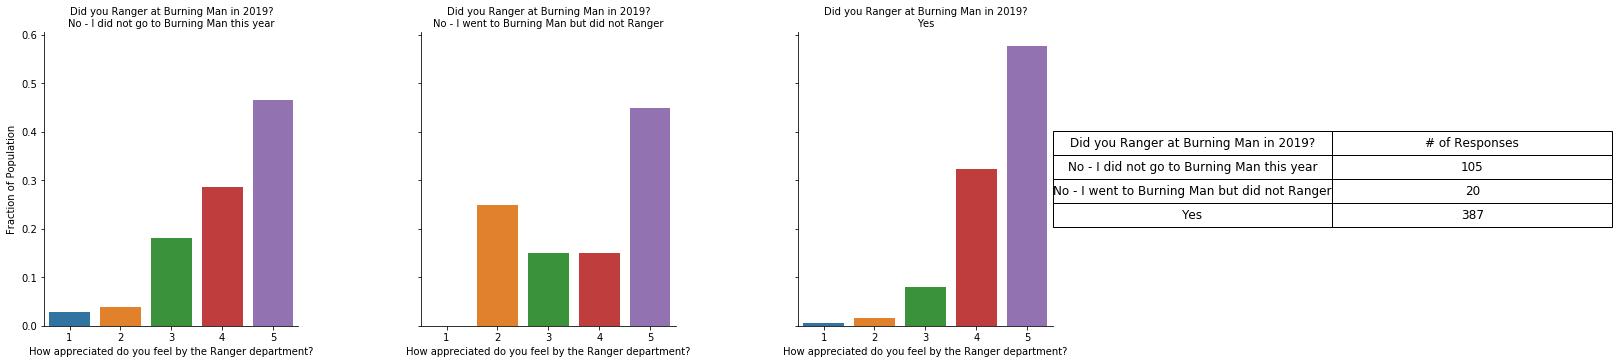

In [7]:
make_bar('How appreciated do you feel by the Ranger department?','Did you Ranger at Burning Man in 2019?', survey_res)
plt.savefig('img/appreciated_cond_on_ranger_this_year-' + src_data_date_updated + '.png', bbox_inches="tight", pad_inches=1)

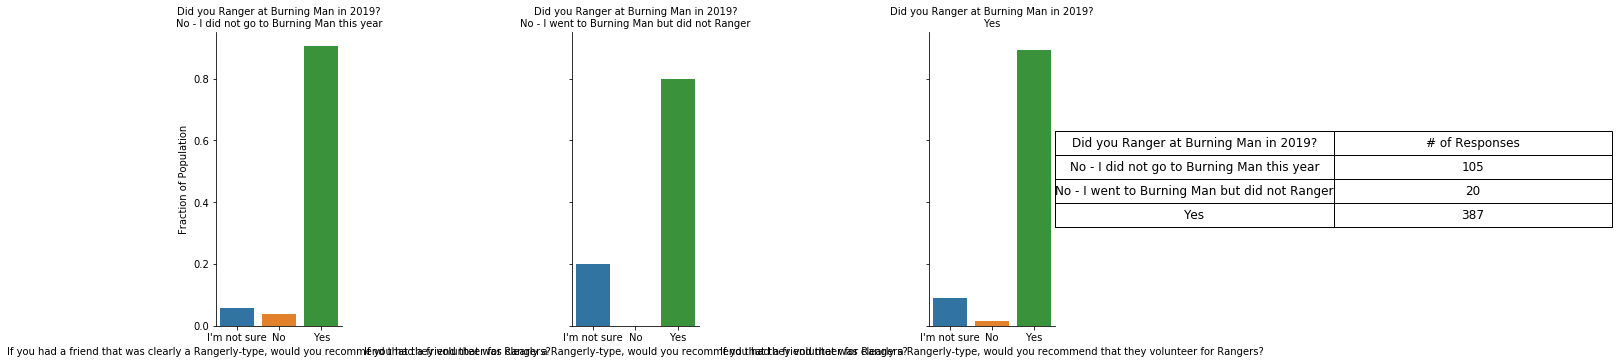

In [8]:
make_bar('If you had a friend that was clearly a Rangerly-type, would you recommend that they volunteer for Rangers?',
         'Did you Ranger at Burning Man in 2019?', survey_res, table_row_width_scale=2)
plt.savefig('img/rec_cond_on_ranger_this_year-' + src_data_date_updated + '.png', bbox_inches="tight", pad_inches=1)

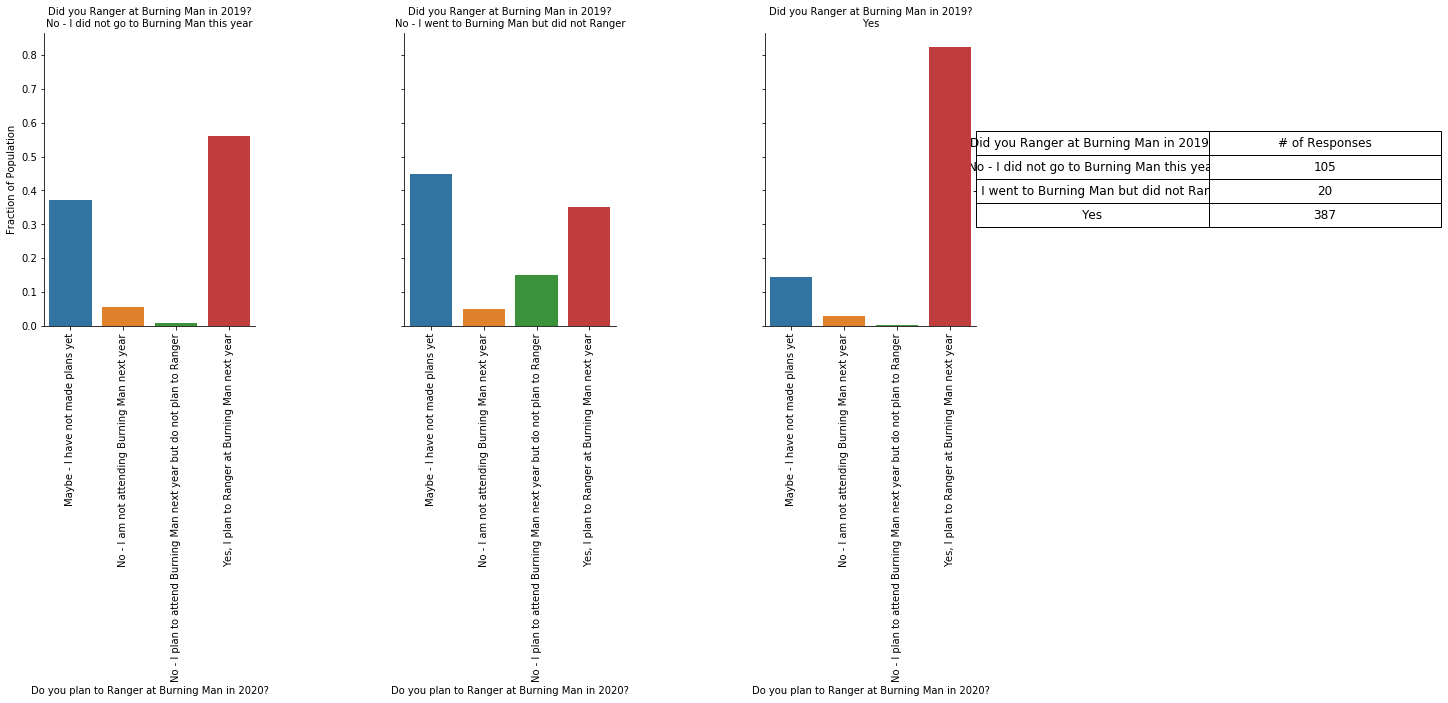

In [9]:
# rotate axis labels
make_bar('Do you plan to Ranger at Burning Man in 2020?','Did you Ranger at Burning Man in 2019?', survey_res, rotation=90)
plt.savefig('img/ranger_next_year_cond_on_ranger_this_year-' + src_data_date_updated + '.png', bbox_inches="tight", pad_inches=1)

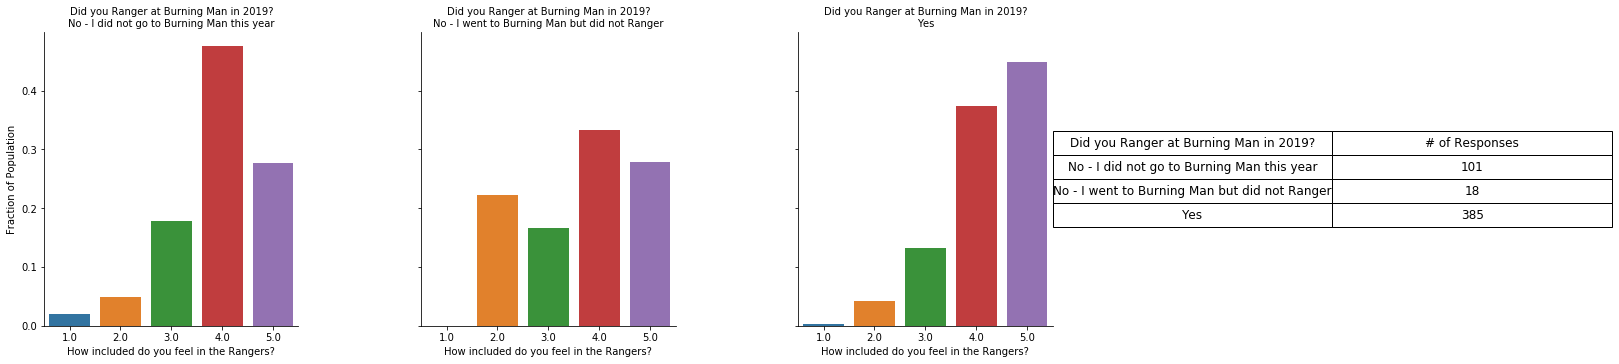

In [10]:
make_bar('How included do you feel in the Rangers?','Did you Ranger at Burning Man in 2019?', survey_res)
plt.savefig('img/how_included_cond_on_ranger_this_year-' + src_data_date_updated + '.png', bbox_inches="tight", pad_inches=1)

/Users/juliet/.pyenv/versions/3.6.8/envs/311-3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


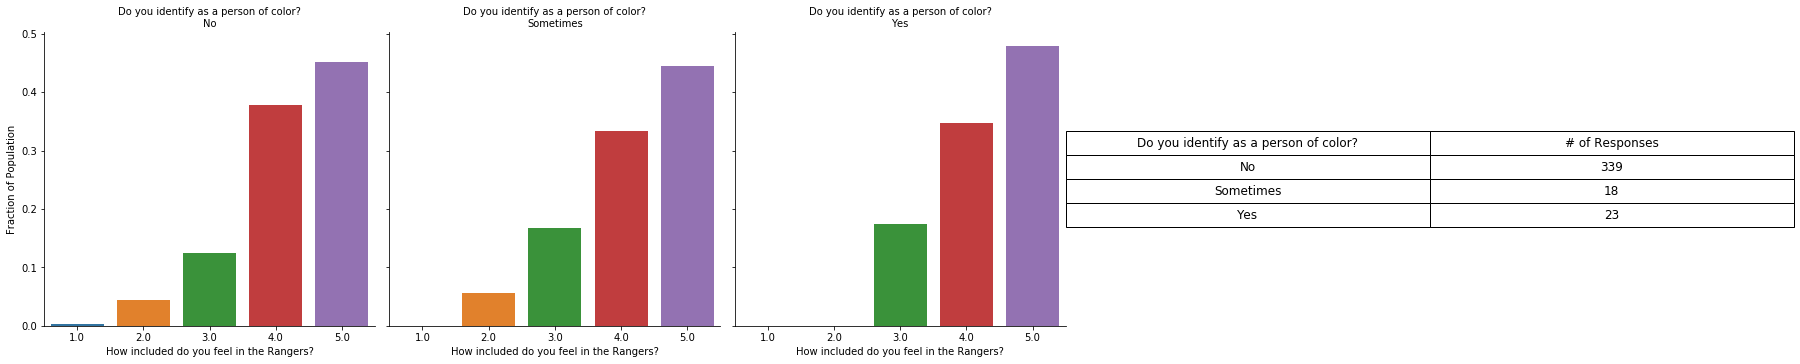

In [11]:
gen_mapping = {'Female' : 'f', 'male': 'm', 'Male': 'm', 'Cis Male': 'm',
       'Male.': 'm', 'female': 'f', 'Man/Male': 'm', 'CIS Male': 'm',
     'Cis male': 'm', 'Male ': 'm', 'Cis-male': 'm', 'M': 'm',
       'cis-het-male': 'm', 'Man': 'm', 'F': 'f', 'Male, definitely': 'm',
       'man': 'm', 'Dude': 'm', 'woman': 'f', 'female / she/her': 'f', 'dude': 'm',
        'boy': 'm', 'Cisgender Woman': 'f', 'Female ': 'f',
       "I'm a lady ": 'f', 'Woman': 'f',
       'Cis-Male': 'm', 'Heteosexual male': 'm', 'Cis het male': 'm', 'Him': 'm',
       'Straight male.': 'm', 'cis-male': 'm', 'he / him': 'm',
       'Male presenting': 'm', 'male binary': 'm', 'He/Him': 'm', 'She/Her': 'f',
       'slightly male': 'm', 'queer male': 'm', 'maleish': 'm'
}

def normalize_genders(df):
    df['What is your primary gender identity (if any)?\n(Normalized)'] = df['What is your primary gender identity (if any)?'].apply(lambda row : gen_mapping.get(row, 'other'))
    return df


rangered_2019 = survey_res[survey_res['Did you Ranger at Burning Man in 2019?'] == 'Yes']
rangered_2019 = normalize_genders(rangered_2019)

make_bar('How included do you feel in the Rangers?', 'Do you identify as a person of color?', rangered_2019)
plt.savefig('img/how_included_cond_on_poc_filtered_by_ranger_2019-' + src_data_date_updated + '.png', bbox_inches="tight", pad_inches=1)

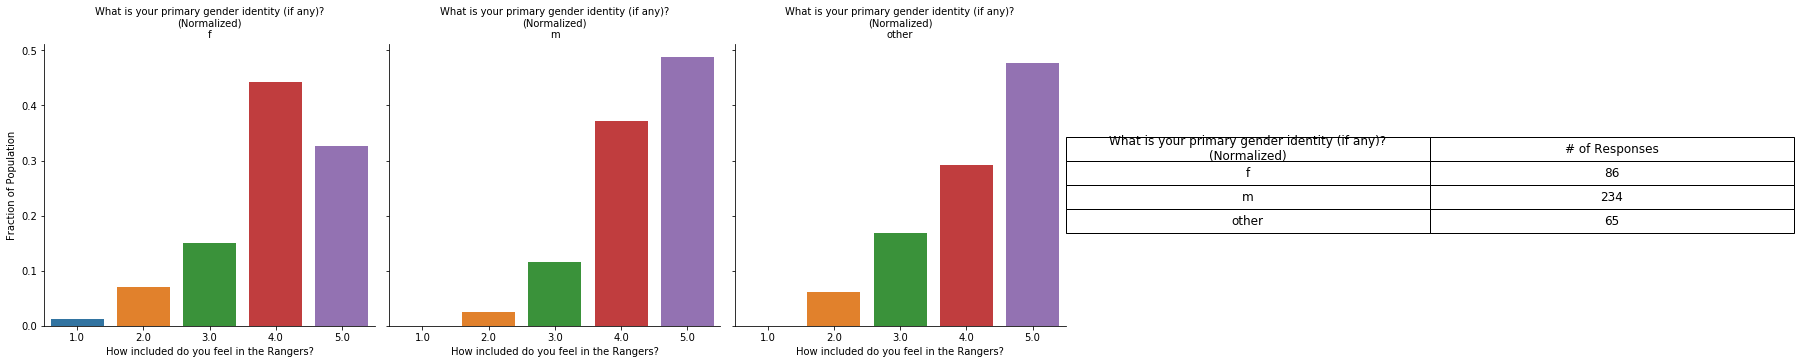

In [12]:
make_bar('How included do you feel in the Rangers?', 'What is your primary gender identity (if any)?\n(Normalized)', rangered_2019)
plt.savefig('img/how_included_cond_on_gender_filtered_by_ranger_2019-' + src_data_date_updated + '.png', bbox_inches="tight", pad_inches=1)

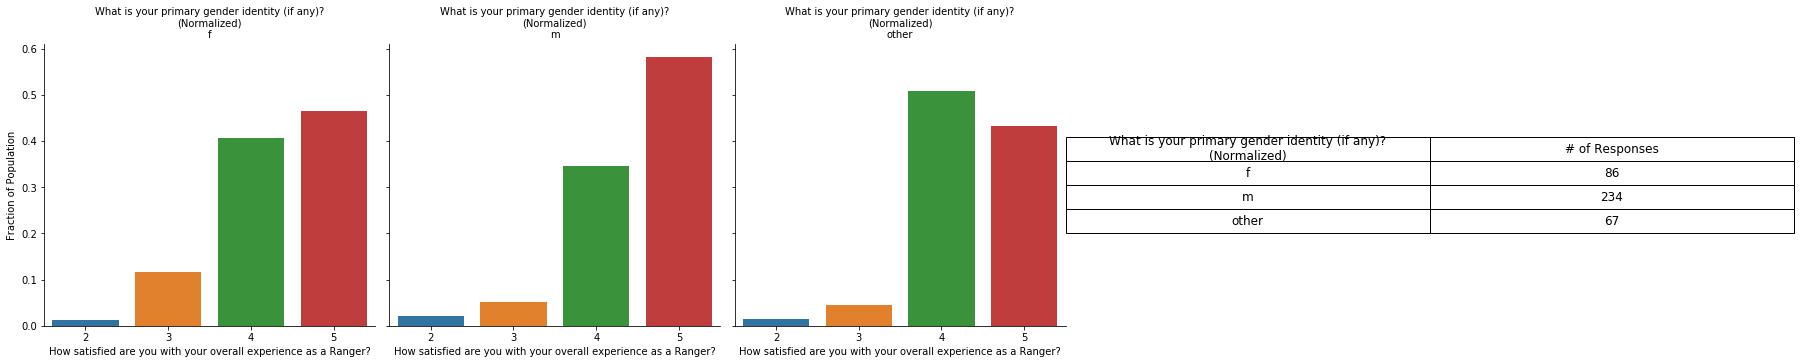

In [13]:
make_bar('How satisfied are you with your overall experience as a Ranger?', 'What is your primary gender identity (if any)?\n(Normalized)', rangered_2019)
plt.savefig('img/overall_exp_cond_on_gender_filtered_by_ranger_2019-' + src_data_date_updated + '.png', bbox_inches="tight", pad_inches=1)

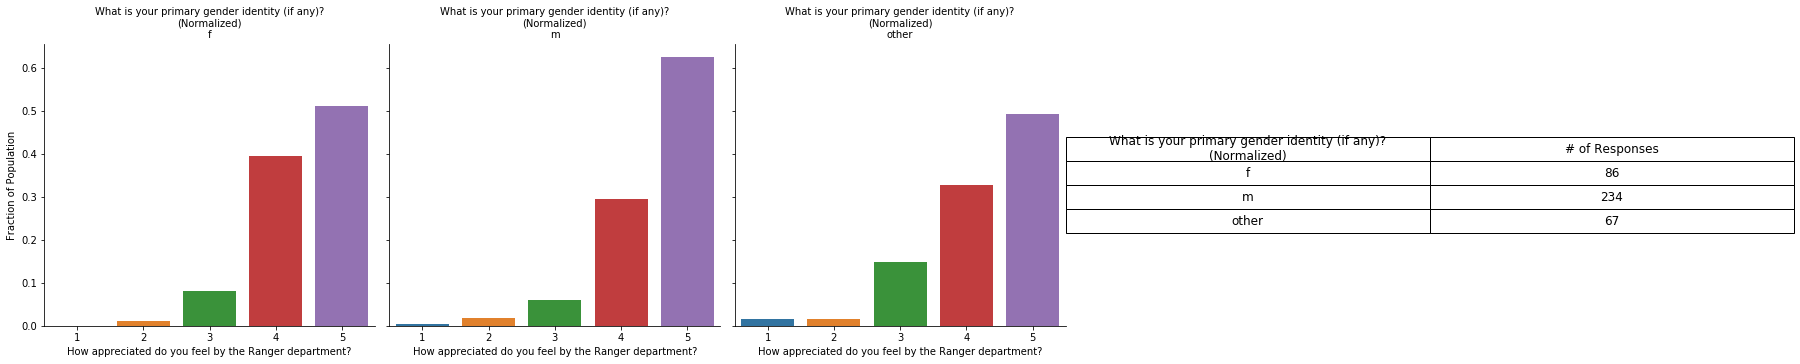

In [14]:
make_bar('How appreciated do you feel by the Ranger department?', 'What is your primary gender identity (if any)?\n(Normalized)', rangered_2019)
plt.savefig('img/appreciated_cond_on_gender_filtered_by_ranger_2019-' + src_data_date_updated + '.png', bbox_inches="tight", pad_inches=1)